## Bike Sharing Pridicting model
### Imports

In [273]:
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
from sklearn.metrics import mean_absolute_error, mean_squared_error, root_mean_squared_error, r2_score
import copy
import tensorflow as tf
from sklearn.linear_model import LinearRegression

### Dataset from UCI Repository
https://archive.ics.uci.edu/dataset/560/seoul+bike+sharing+demand

In [274]:
df = pd.read_csv("seoul_bike_data/SeoulBikeData.csv", encoding="latin-1")
df = df.drop(["Date", "Seasons", "Holiday"], axis=1)
df["Functioning Day"] = (df["Functioning Day"] == "Yes").astype(int)
df.head()

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Functioning Day
0,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,1
1,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,1
2,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,1
3,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,1
4,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,1


In [275]:
df = df[df["Hour"] == 12]
df = df.drop(["Hour"], axis=1)
df.head()

,Rented Bike Count,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Functioning Day
12,449,1.7,23,1.4,2000,-17.2,1.11,0.0,0.0,1
36,479,4.3,41,1.3,1666,-7.8,1.09,0.0,0.0,1
60,333,5.8,85,1.7,349,3.4,0.43,0.0,0.0,1
84,393,-0.3,38,4.8,1823,-12.9,1.11,0.0,0.0,1
108,321,-2.3,25,0.0,1962,-19.7,0.00,0.0,0.0,1


### Ploting some relations

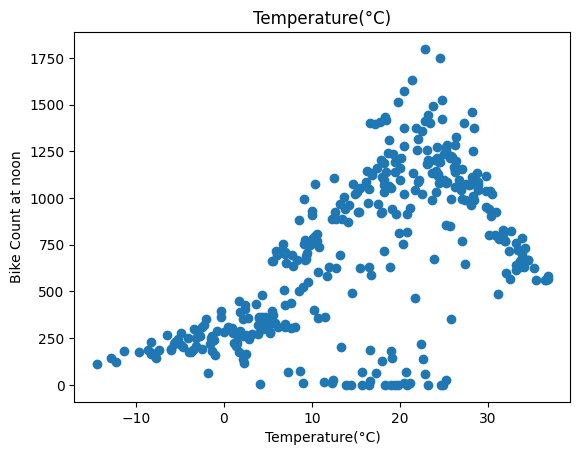

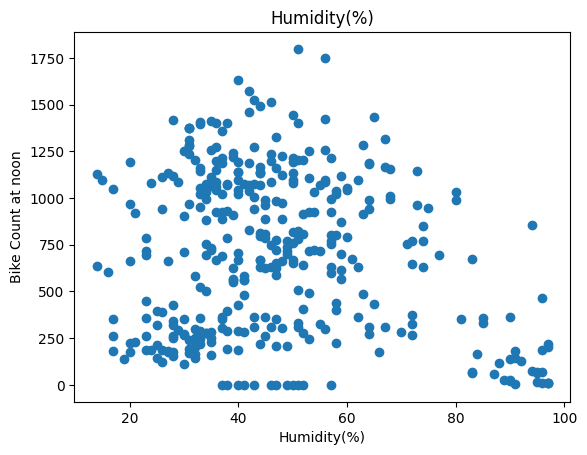

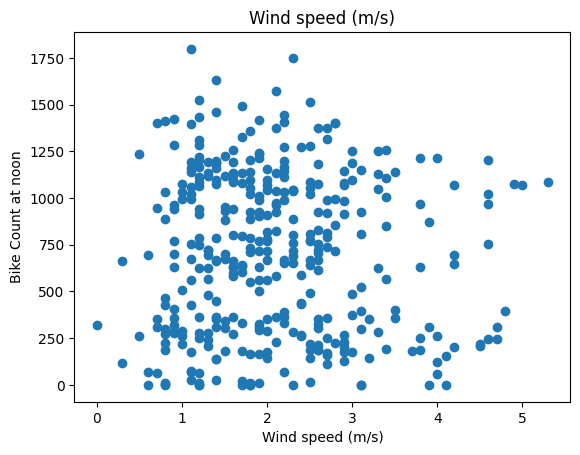

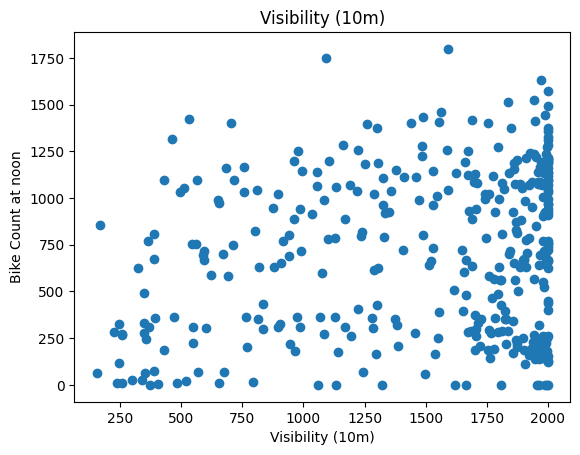

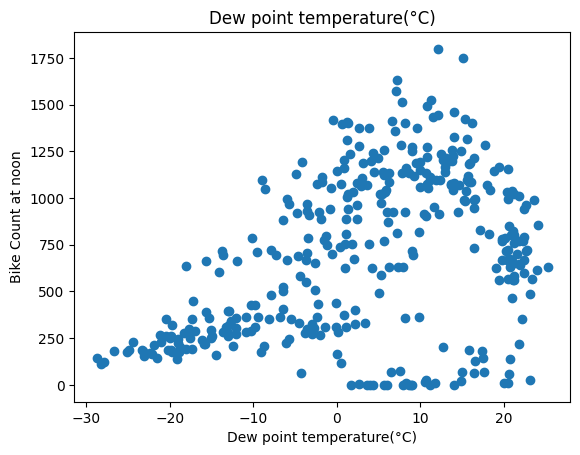

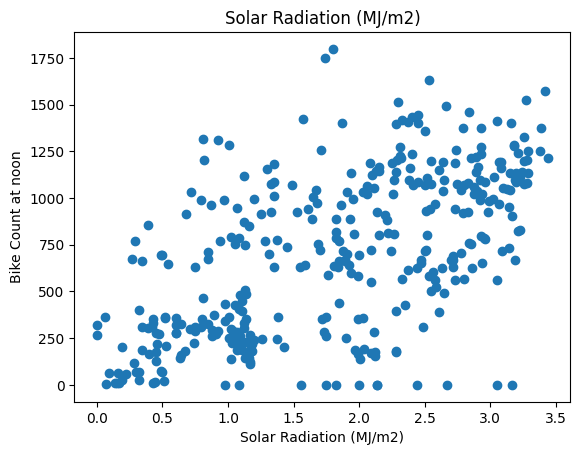

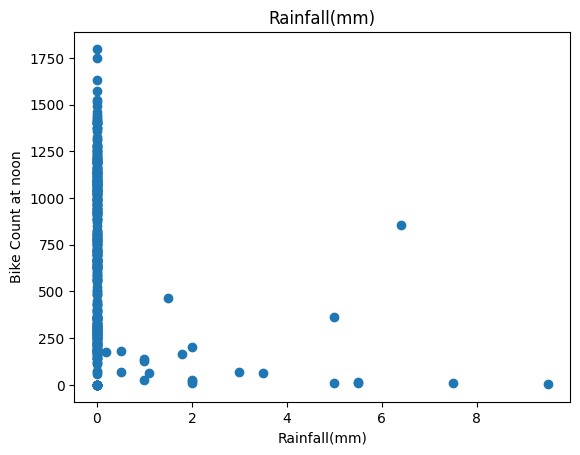

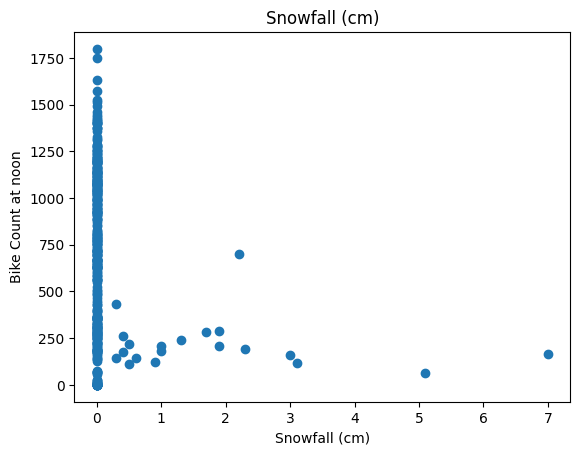

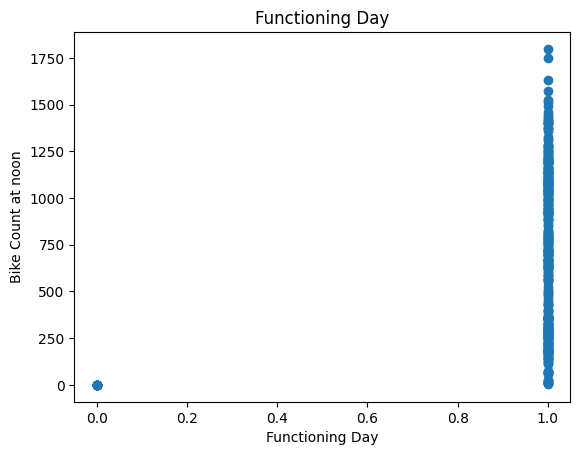

In [276]:
for label in df.columns[1:]:
    plt.scatter(df[label], df["Rented Bike Count"])
    plt.title(label)
    plt.xlabel(label)
    plt.ylabel("Bike Count at noon")
    plt.show()

In [277]:
df = df.drop(["Wind speed (m/s)", "Visibility (10m)", "Functioning Day"], axis=1)
df.head()

,Rented Bike Count,Temperature(°C),Humidity(%),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm)
12,449,1.7,23,-17.2,1.11,0.0,0.0
36,479,4.3,41,-7.8,1.09,0.0,0.0
60,333,5.8,85,3.4,0.43,0.0,0.0
84,393,-0.3,38,-12.9,1.11,0.0,0.0
108,321,-2.3,25,-19.7,0.00,0.0,0.0


### Separating trainning dataset from validation and testing

In [278]:
train, valid, test = np.split(df.sample(frac=1), [int(0.6*len(df)), int(0.8*len(df))])

c:\Users\Admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\core\fromnumeric.py:59: FutureWarning: 'DataFrame.swapaxes' is deprecated and will be removed in a future version. Please use 'DataFrame.transpose' instead.
  return bound(*args, **kwds)


### Scaling and oversampling

In [279]:
def get_xy(dataframe, y_label, x_labels=None):
    dataframe = copy.deepcopy(dataframe)
    if x_labels is None:
        X = dataframe[[c for c in dataframe.columns if c!=y_label]].values
    else:
        if len(x_labels) == 1:
            X = dataframe[x_labels[0]].values.reshape((-1, 1))
        else:
            X = dataframe[x_labels].values

    y = dataframe[y_label].values
    data = np.hstack((X, y.reshape((-1, 1))))
    return data, X, y

In [280]:
train_temp, x_train_temp, y_train_temp = get_xy(train, "Rented Bike Count", ["Temperature(°C)"])
valid_temp, x_valid_temp, y_valid_temp = get_xy(valid, "Rented Bike Count", ["Temperature(°C)"])
test_temp, x_test_temp, y_test_temp = get_xy(test, "Rented Bike Count", ["Temperature(°C)"])

### Linear Regression

In [281]:
regresser = LinearRegression()
regresser = regresser.fit(x_train_temp, y_train_temp)
regresser.score(x_test_temp, y_test_temp)

0.3117787125691719

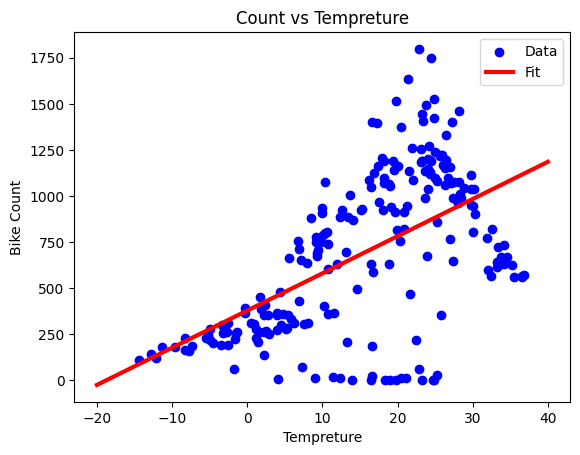

In [282]:
plt.scatter(x_train_temp, y_train_temp, label="Data", color="blue")
x = tf.linspace(-20, 40, 100)
plt.plot(x, regresser.predict(np.array(x).reshape((-1,1))), color="red", linewidth=3, label="Fit")
plt.title("Count vs Tempreture")
plt.ylabel("Bike Count")
plt.xlabel("Tempreture")
plt.legend()
plt.show()

### Multiple Linear Regreation

In [283]:
_, x_train, y_train = get_xy(train, "Rented Bike Count")
_, x_valid, y_valid = get_xy(valid, "Rented Bike Count")
_, x_test, y_test = get_xy(test, "Rented Bike Count")

In [284]:
reg_model = LinearRegression()
reg_model = reg_model.fit(x_train, y_train)
reg_model.score(x_test, y_test)

0.4923882661630318

In [285]:
y_predict = reg_model.predict(x_test)

print("mean squared error", mean_squared_error(y_test, y_predict))
print("mean absolut error", mean_absolute_error(y_test, y_predict))
print("root mean squared error", root_mean_squared_error(y_test, y_predict))
print("r2 score", r2_score(y_test, y_predict))

mean squared error 98199.6245662232
mean absolut error 243.80254302513455
root mean squared error 313.3681932906133
r2 score 0.4923882661630318


### Stochastic Gradien Descent

In [288]:
from sklearn.linear_model import SGDRegressor

SGD_model = SGDRegressor()
SGD_model = SGD_model.fit(x_train, y_train)
SGD_model.score(x_test, y_test)

-3.3643997041009586e+19

In [289]:
y_predict = SGD_model.predict(x_test)

print("mean squared error", mean_squared_error(y_test, y_predict))
print("mean absolut error", mean_absolute_error(y_test, y_predict))
print("root mean squared error", root_mean_squared_error(y_test, y_predict))
print("r2 score", r2_score(y_test, y_predict))

mean squared error 6.508572710408166e+24
mean absolut error 2325707236302.52
root mean squared error 2551190449654.468
r2 score -3.3643997041009586e+19
